# Case Study 1: Clustering the Iris Dataset
## ECE 204 Data Science & Engineering 

In [1]:
import pandas as pd
df = pd.read_csv("iris.csv").iloc[:, :4]
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


This dataset contains measurements for different types of flowers. Here are more detail on the measurements:

<img src="https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg" width="250" />

## Visualize data

Let's do the most basic level of investigation: looking at the data!

There are only 4 features for each flower measurement. Let's visualize all pairs between different features, i.e., plotting `petalLength` and `sepalLength` together with a scatter plot. If there's a clear relation between a pair of variables, this will make the relationship more clear.

It looks like there's at least two species of flowers in this dataset -- for example, look at `sepalWidth` against `petalWidth`:

<Axes: xlabel='sepalWidth', ylabel='petalWidth'>

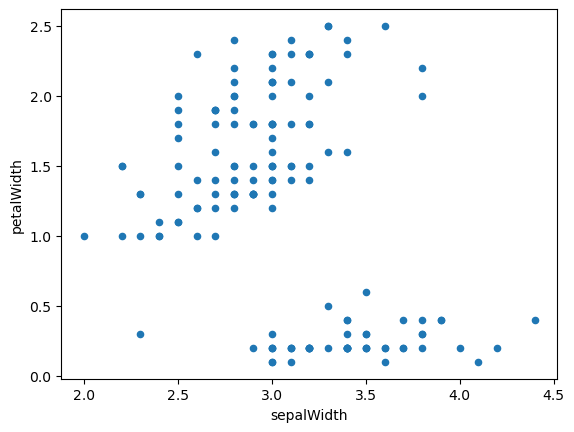

In [2]:
df.plot.scatter(x="sepalWidth", y="petalWidth")

That's a pretty clear separation.

However, the above plot visualizes one *pair* of variables. **What if 3 or 4 variables are important in determining the species?**

## Clustering

Let's consider the embedding: `[petalLength, petalWidth, sepalLength, sepalWidth]` and use K-Means to cluster the points (flowers) into different groups.

In [3]:
from sklearn.cluster import KMeans

Scikit-Learn implements many machine learning algorithms. More details on KMeans specifically can be found in the user guide, which walks through some examples: https://scikit-learn.org/stable/modules/clustering.html#k-means

In [4]:
km = KMeans(n_clusters=2)
km.fit(df)

/Users/hydrablaster/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

Now compute the assignment of each datapoint its associated cluster

In [5]:
y_hat = km.predict(df)
print(y_hat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


A shortcut: you can do the fitting and predicting in one shot using the "fit_predict" command:

In [6]:
y_hat = km.fit_predict(df)

/Users/hydrablaster/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Let's visualize the results:

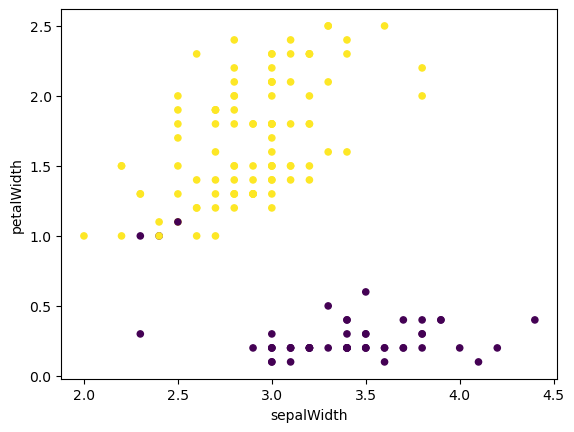

In [7]:
ax = df.plot.scatter(x="sepalWidth", y="petalWidth", c=y_hat, cmap="viridis", colorbar=False)

We can inspect the location of each cluster centroid: 

In [8]:
km.cluster_centers_

array([[1.56037736, 0.29056604, 5.00566038, 3.36981132],
       [4.95876289, 1.69587629, 6.30103093, 2.88659794]])

Let's try changing the number of clusters:

In [9]:
km = KMeans(n_clusters=3)
y_hat = km.fit_predict(df)

/Users/hydrablaster/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='sepalWidth', ylabel='petalWidth'>

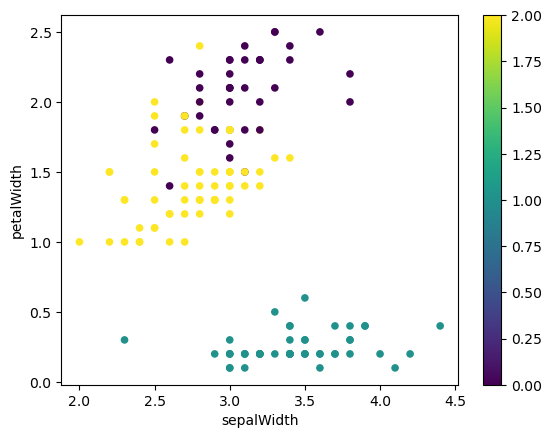

In [10]:
df.plot.scatter(x="sepalWidth", y="petalWidth", c=y_hat, cmap="viridis")

Let's try visualizing different pairs of variables, and see how they look:

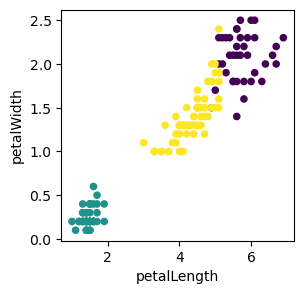

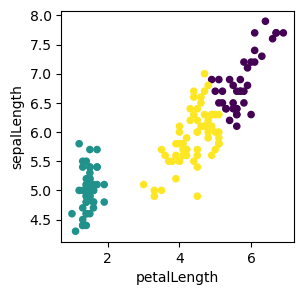

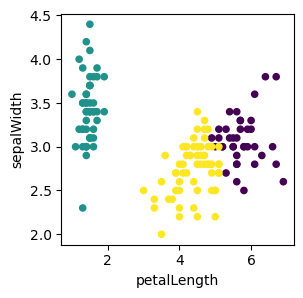

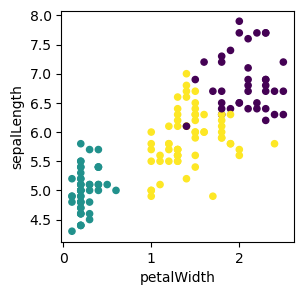

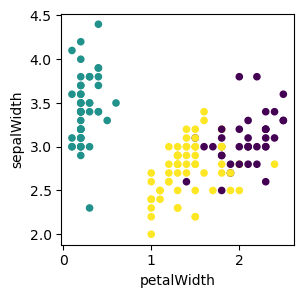

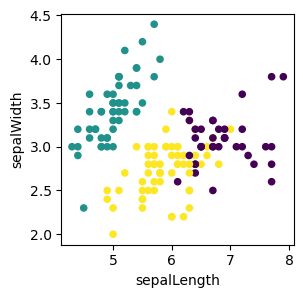

In [11]:
columns = ['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']

for i in range(4):
    for j in range(i+1,4):
        df.plot.scatter(x=columns[i], y=columns[j], c=y_hat,
            cmap="viridis", colorbar=False, figsize=(3,3) )

Two of the classes are always mashed together. **Should `n_clusters` be 2 or 3?** It's hard to tell from inspecting these plots. We can say with certainty that there are *at least* two distinct clusters.

Luckily, we have more information from the underlying dataset, namely the species of each flower:

In [12]:
df = pd.read_csv("iris.csv")
print(df.species.unique())
df.head()

['setosa' 'versicolor' 'virginica']


,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


Let's see how accurate `KMeans` performed the clustering -- does it group flowers of the same species together?

## How accurate is the clustering?
Here's the process to check this:

1. Re-run our `Kmeans` with 3 clusters
2. Match the *cluster* labels with the `species` labels
3. See whether the clusters 

### Re-running KMeans

In [13]:
km = KMeans(n_clusters=3, random_state=42)

features = ['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']
y_hat = km.fit_predict(df[features])

/Users/hydrablaster/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


*Note:* Only the features are used, not the species.

The `random_state` keyword in `KMeans` removes some of the randomness in `KMeans` clustering. Specifying `random_state` as an integer is an easy way to get the same result each time.

### Matching clusters with species

Cluster labels are *numeric*:

In [14]:
print(y_hat)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Let's figure out what the mapping should be by examining the data:

In [15]:
# First, assign a column in the dataframe
df["assigned_cluster"] = y_hat

# now look at the clusters for each species:
df[ df.species == 'virginica' ]

,petalLength,petalWidth,sepalLength,sepalWidth,species,assigned_cluster
100,6.0,2.5,6.3,3.3,virginica,2
101,5.1,1.9,5.8,2.7,virginica,0
102,5.9,2.1,7.1,3.0,virginica,2
103,5.6,1.8,6.3,2.9,virginica,2
104,5.8,2.2,6.5,3.0,virginica,2
105,6.6,2.1,7.6,3.0,virginica,2
106,4.5,1.7,4.9,2.5,virginica,0
107,6.3,1.8,7.3,2.9,virginica,2
108,5.8,1.8,6.7,2.5,virginica,2
109,6.1,2.5,7.2,3.6,virginica,2


It looks like "viriginica" = 0, "setosa" = 1, and "versicolor" = 2. Let's make an array that maps index to label:

In [16]:
# create a list of the labels where the index corresponds to the cluster number.
label_mapping = ['virginica', 'setosa', 'versicolor']

def get_label(number):
    return label_mapping[number]

df["assigned_species"] = df.assigned_cluster.apply(get_label)
print(len(df))
df.head(100)

150


,petalLength,petalWidth,sepalLength,sepalWidth,species,assigned_cluster,assigned_species
0,1.4,0.2,5.1,3.5,setosa,1,setosa
1,1.4,0.2,4.9,3.0,setosa,1,setosa
2,1.3,0.2,4.7,3.2,setosa,1,setosa
3,1.5,0.2,4.6,3.1,setosa,1,setosa
4,1.4,0.2,5.0,3.6,setosa,1,setosa
...,...,...,...,...,...,...,...
95,4.2,1.2,5.7,3.0,versicolor,0,virginica
96,4.2,1.3,5.7,2.9,versicolor,0,virginica
97,4.3,1.3,6.2,2.9,versicolor,0,virginica
98,3.0,1.1,5.1,2.5,versicolor,0,virginica


### Accuracy 

In [17]:
def accuracy(actual, pred):
    return (actual == pred).sum() / len(actual)

accuracy(df.species, df.assigned_species)

0.44

Looks like the KMeans finds meaningful clusters!